In [477]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

import datetime
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['figure.figsize'] = [15, 10]

In [478]:
df = pd.read_csv('clustering_data.csv')

In [479]:
df

,Unnamed: 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
0,0,-1.784220,9.139177,2.517077,-6.691300,3.332583,-6.189314,-8.294717,-5.527558,-9.150377,-3.437419
1,1,4.513056,-6.242134,-9.764999,8.975386,0.213133,-5.610271,6.194787,-0.247325,-1.000023,-9.091131
2,2,1.076570,-6.806062,-11.354346,11.589776,1.223487,-4.481565,5.119435,-0.036395,-2.308850,-5.820222
3,3,-0.203146,-6.098289,10.389102,-3.527880,-6.376361,3.444334,-0.331659,-3.784060,-6.922082,-3.463537
4,4,-4.488164,9.539276,0.414895,-3.298754,4.835677,-6.927819,-9.123490,-3.135282,-10.179017,-3.273429
...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,-1.946019,-5.311701,6.450032,-3.702229,-6.876948,1.629110,-3.398310,-4.534716,-6.746924,-4.928462
2496,2496,3.688606,-9.763320,-6.745432,8.385506,-0.077451,-7.701742,4.784362,-1.560023,-1.079255,-6.833646
2497,2497,-6.151428,-0.120076,6.293342,1.694578,-1.065751,-5.811064,-10.625511,3.157429,-3.792363,-6.793285
2498,2498,-2.641632,8.073094,0.956380,-5.387133,4.496828,-6.396634,-9.163113,-1.719945,-10.508237,-3.756620


In [480]:
norm_df = (df-df.mean())/df.std()
norm_df.drop('Unnamed: 0', axis=1, inplace=True)
norm_df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
0,-0.346222,1.620719,0.289920,-1.159613,1.071976,-0.701901,-1.021742,-1.381947,-0.882014,0.213513
1,0.916851,-0.925118,-1.346161,1.851292,0.109209,-0.565861,0.987042,-0.051696,1.104972,-1.801868
2,0.227579,-1.018457,-1.557876,2.353739,0.421038,-0.300682,0.837958,0.001443,0.785891,-0.635886
3,-0.029099,-0.901310,1.338543,-0.551651,-1.924531,1.561433,0.082234,-0.942707,-0.338775,0.204202
4,-0.888565,1.686941,0.009891,-0.507616,1.535882,-0.875406,-1.136641,-0.779260,-1.132787,0.271970
...,...,...,...,...,...,...,...,...,...,...
2495,-0.378675,-0.771118,0.813824,-0.585158,-2.079029,1.134963,-0.342918,-1.131820,-0.296073,-0.318000
2496,0.751487,-1.507927,-0.943928,1.737926,0.019525,-1.057232,0.791505,-0.382405,1.085656,-0.997141
2497,-1.222173,0.088174,0.792951,0.452028,-0.285498,-0.613035,-1.344877,0.806065,0.424224,-0.982754
2498,-0.518197,1.444266,0.082021,-0.908972,1.431301,-0.750609,-1.142134,-0.422694,-1.213048,0.099727


array([[<AxesSubplot:xlabel='feature 1', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 2', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 3', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 4', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 5', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 6', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 7', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 8', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 9', ylabel='feature 1'>,
        <AxesSubplot:xlabel='feature 10', ylabel='feature 1'>],
       [<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>,
        <AxesSubplot:xlabel='feature 2', ylabel='feature 2'>,
        <AxesSubplot:xlabel='feature 3', ylabel='feature 2'>,
        <AxesSubplot:xlabel='feature 4', ylabel='feature 2'>,
        <AxesSubplot:xlabel='feature 5', ylabel='feature 2'>,
        <AxesSubplot:xlabel='feature 6', ylabel='feature 2'>,
      

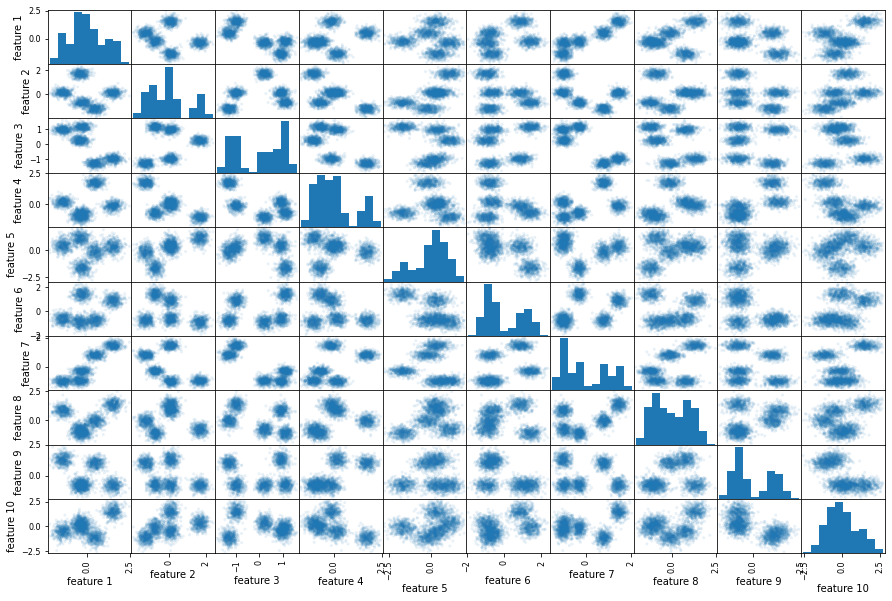

In [481]:
pd.plotting.scatter_matrix(norm_df, alpha=0.1)

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>]], dtype=object)

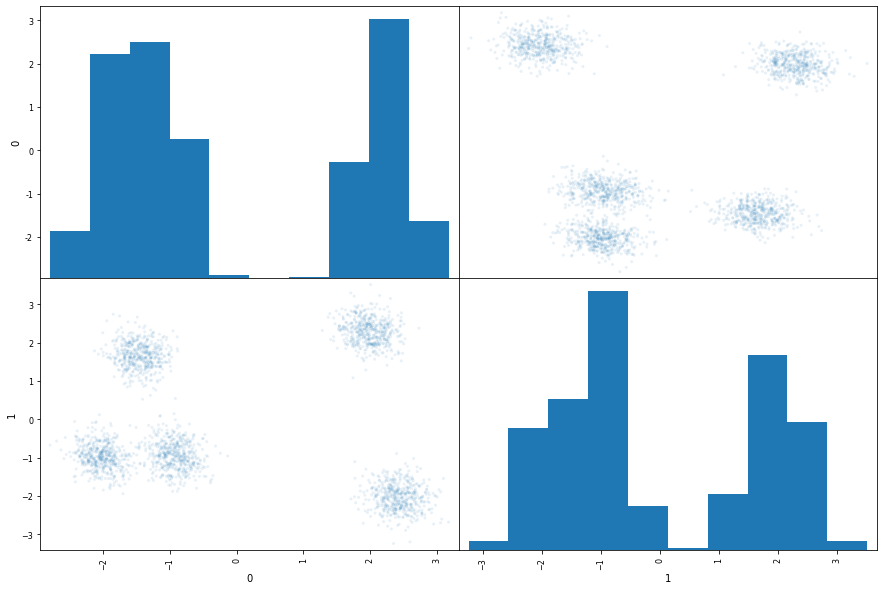

In [482]:
# Using PCA to see results of dimensionality reduction.
pca = PCA(n_components=2)
principalComponents = pd.DataFrame(pca.fit_transform(norm_df))
pd.plotting.scatter_matrix(principalComponents, alpha=0.1)

In [483]:
def kmeans_data(df, lower, upper):
    clusters = pd.DataFrame()
    count = 0
    centroids = list()
    for i in range(lower, upper):
        count += 1
        kmeans = sklearn.cluster.KMeans(n_clusters=i).fit(df)
        centroids.append(kmeans.cluster_centers_)
        clusters[f'{i}_means cluster'] = kmeans.labels_[:]
    return clusters, centroids

In [484]:
l = 3
u = 13
k_means_clusters, k_means_centroids = kmeans_data(principalComponents, l, u)

In [485]:
k_means_clusters

,3_means cluster,4_means cluster,5_means cluster,6_means cluster,7_means cluster,8_means cluster,9_means cluster,10_means cluster,11_means cluster,12_means cluster
0,1,2,0,0,4,4,7,0,4,4
1,2,3,1,2,2,1,0,6,1,1
2,2,3,1,2,2,7,8,1,5,5
3,1,2,4,4,1,5,5,4,6,6
4,1,2,0,0,5,4,4,0,9,4
...,...,...,...,...,...,...,...,...,...,...
2495,1,2,4,5,6,0,1,5,0,0
2496,2,3,1,2,2,1,0,9,1,1
2497,1,0,3,3,0,3,3,3,3,10
2498,1,2,0,0,4,4,7,0,4,4


In [486]:
def DBSCAN_data(df, lower=1, upper=10):
    clusters = pd.DataFrame()
    dists = [0.05 * i for i in range(lower, upper)]
    for d in dists:
        dbscan = sklearn.cluster.DBSCAN(eps=d, min_samples=2).fit(df)
        clusters[f'DBSCAN r={round(d, 2)} cluster'] = dbscan.labels_[:]
    return clusters

In [487]:
l_dbscan = 6
u_dbscan = 30
dbscan_clusters = DBSCAN_data(principalComponents, l_dbscan, u_dbscan)
r_list = [0.05 * i for i in range(l_dbscan, u_dbscan)]
dbscan_clusters

,DBSCAN r=0.3 cluster,DBSCAN r=0.35 cluster,DBSCAN r=0.4 cluster,DBSCAN r=0.45 cluster,DBSCAN r=0.5 cluster,DBSCAN r=0.55 cluster,DBSCAN r=0.6 cluster,DBSCAN r=0.65 cluster,DBSCAN r=0.7 cluster,DBSCAN r=0.75 cluster,...,DBSCAN r=1.0 cluster,DBSCAN r=1.05 cluster,DBSCAN r=1.1 cluster,DBSCAN r=1.15 cluster,DBSCAN r=1.2 cluster,DBSCAN r=1.25 cluster,DBSCAN r=1.3 cluster,DBSCAN r=1.35 cluster,DBSCAN r=1.4 cluster,DBSCAN r=1.45 cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2497,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [488]:
# Distance matrix
DistMatrix = cdist(principalComponents, principalComponents, 'euclid')

In [489]:
# Cluster indexing
dbscan_clusters_idx = list()
k_means_clusters_idx = list()

def index_clusters(cluster_df):
    idx = list()
    col = 0
    for key, value in cluster_df.iteritems():
        idx.append(dict())
        for key2, value2 in value.items():
            if value2 not in idx[col].keys():
                idx[col][value2] = list()
            idx[col][value2].append(key2)
        col += 1
    return idx

dbscan_clusters_idx = index_clusters(dbscan_clusters)
k_means_clusters_idx = index_clusters(k_means_clusters)


In [490]:
# We go through pairs of intra cluster and intra cluster and calculate values:
# inter and intra weight, Wmax(Nin), Wmin(Nin), Silhouette coefficient
def Internal_calc(cluster_idx, W):
    intra_weight = 0
    inter_weight = 0
    Nin = 0
    Nout = 0
    mu_out_list = list()
    SC = 0
    
    # Going through each cluster and calculating the intra cluster weight sum.
    for cluster1 in cluster_idx.keys():
        if cluster1 == -1:
            continue
            
        ni = len(cluster_idx[cluster1])
        Nin += 0.5 * ni * (ni - 1)
        
        # Intra weight sum
        for point1 in cluster_idx[cluster1]:
            intra_sum = 0
            for point2 in cluster_idx[cluster1]:
                intra_sum += W[point1][point2]
            
            mu_in = intra_sum / (ni - 1)
            intra_weight += 0.5 * intra_sum

            mu_out_list = list()
            # Going through each cluster
            for cluster2 in cluster_idx.keys():
                n2 = len(cluster_idx[cluster2])
                inter_sum = 0
                
                # Skipping the points with no cluster (DBSCAN)
                if cluster2 == -1 or cluster1 == cluster2:
                    continue
                
                # Going through each point in the second cluster
                for point2 in cluster_idx[cluster2]:
                        inter_sum += W[point1][point2]
               
                mu_out_list.append(inter_sum / n2)
                inter_weight += 0.5 * inter_sum
            
            if not mu_out_list:
                continue
                
            mu_out_min = min(mu_out_list)
            if mu_in != 0 and mu_out_min != 0:
                SC += (mu_out_min - mu_in) / max((mu_out_min, mu_in))  # Silhouette Coefficient
                
    if Nin != 0:
        SC /= (0.5 * W.shape[0] * (W.shape[0] - 1))
        Nout = 0.5 * W.shape[0] * (W.shape[0] - 1) - Nin
        Nin = int(Nin)
        Wtemp = W.ravel()
        Wtemp.sort()
        return intra_weight, inter_weight, Nin, Nout, np.sum(Wtemp[:Nin]), np.sum(Wtemp[-Nin:]), SC
    else:
        return 1, 1, 1, 100, 10, 1, -1

In [491]:
# Measurs
def BetaCV(Win, Wout, Nin, Nout):
    return (Nout / Nin) * (Win / Wout)

def Cindex(Win, Wmin, Wmax):
    return (Win - Wmin) / (Wmax - Wmin)

def WSS(df, cluster_idx, centroids):
    SSE = 0
    for cluster in cluster_idx.keys():            
        for point in cluster_idx[cluster]:
            SSE += np.sum((df.iloc[point].values - centroids[cluster]) * (df.iloc[point].values - centroids[cluster]))
    
    return SSE

In [499]:
# Looping over clusters
def loop_clusters(clusters_idx, W, centroids, df, is_kmeans):
    BetaCV_list = list()
    Cindex_list = list()
    SC_list = list()
    WSS_list = list()
    count = 0
    for idx in clusters_idx:
        Win, Wout, Nin, Nout, Wmin, Wmax, SC = Internal_calc(idx, W)
        BetaCV_list.append(BetaCV(Win, Wout, Nin, Nout))
        Cindex_list.append(Cindex(Win, Wmin, Wmax))
        SC_list.append(SC)
        if is_kmeans:
            WSS_list.append(WSS(df, idx, centroids[count]))
        count += 1
    return BetaCV_list, Cindex_list, SC_list, WSS_list

In [501]:
BetaCV_list_kmeans, Cindex_list_kmeans, SC_list_kmeans, WSS_list_kmeans = loop_clusters(k_means_clusters_idx, DistMatrix, k_means_centroids, principalComponents, True)

[3036.853855941941, 733.1733807453996, 428.32929636384983, 383.62834404228875, 349.8381782181294, 308.64359924206525, 275.02829480525884, 261.30072414099476, 227.34573723973693, 216.2571099235149]


In [502]:
BetaCV_list_dbscan, Cindex_list_dbscan, SC_list_dbscan, WSS_list = loop_clusters(dbscan_clusters_idx, DistMatrix, k_means_centroids, principalComponents, False)

[]


Text(0.5, 0, 'Number of means')

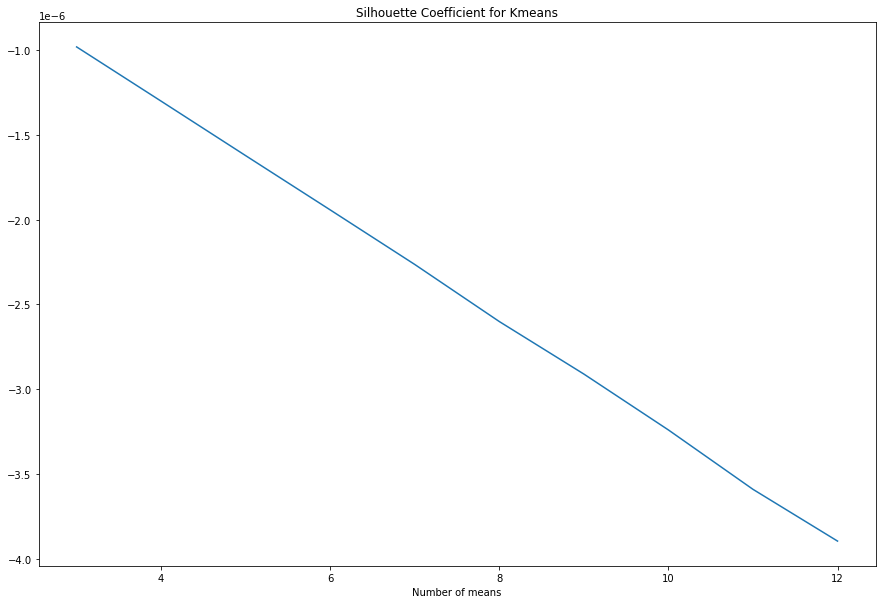

In [503]:
plt.plot(range(l, u), SC_list_kmeans)
plt.title('Silhouette Coefficient for Kmeans')
plt.xlabel('Number of means')

Text(0.5, 0, 'Number of means')

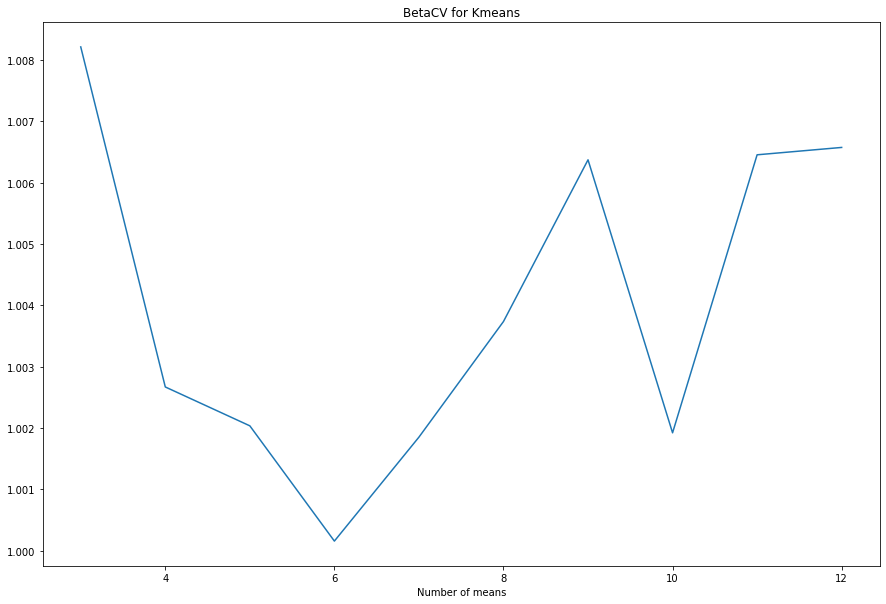

In [504]:
plt.plot(range(l, u), BetaCV_list_kmeans)
plt.title('BetaCV for Kmeans')
plt.xlabel('Number of means')

Text(0.5, 0, 'Number of means')

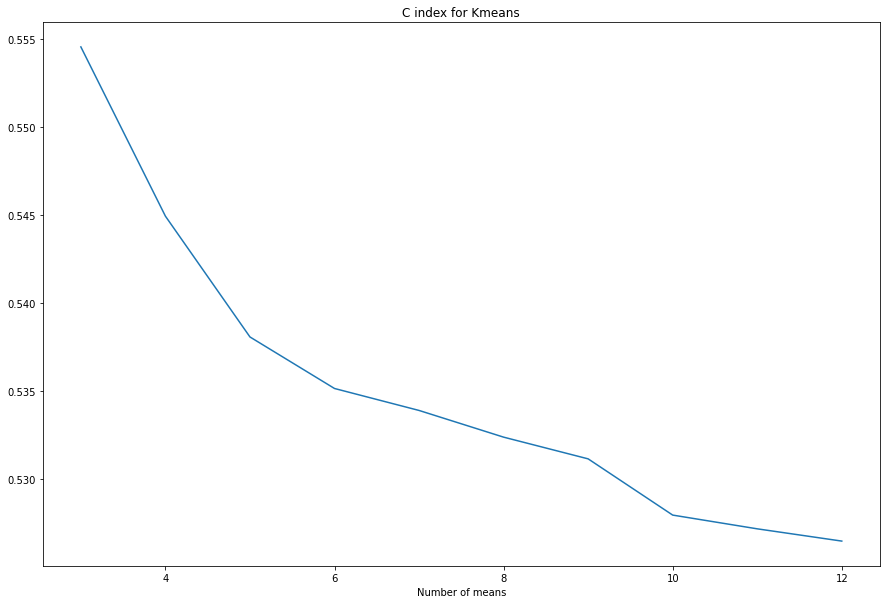

In [505]:
plt.plot(range(l, u), Cindex_list_kmeans)
plt.title('C index for Kmeans')
plt.xlabel('Number of means')

Text(0.5, 0, 'Number of means')

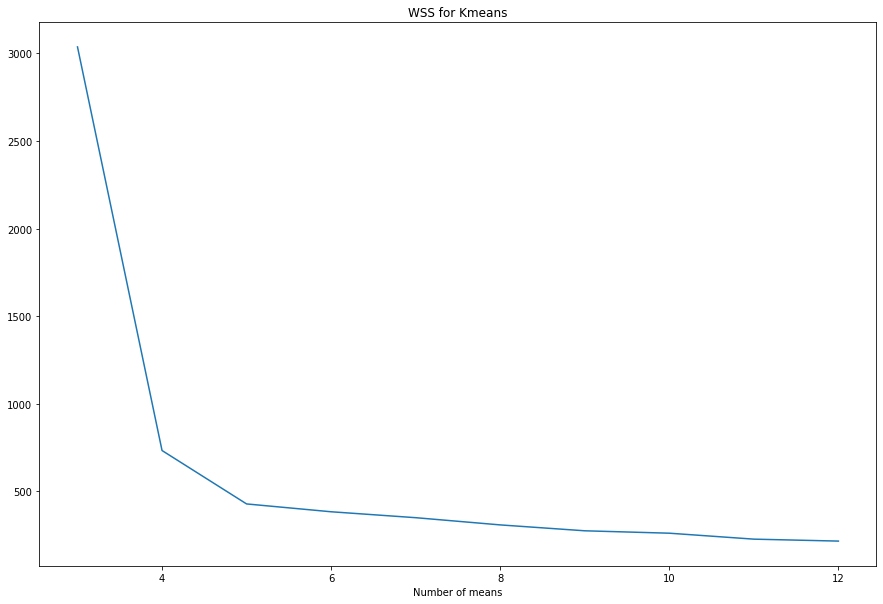

In [506]:
plt.plot(range(l, u), WSS_list_kmeans)
plt.title('WSS for Kmeans')
plt.xlabel('Number of means')

Text(0.5, 0, 'radius')

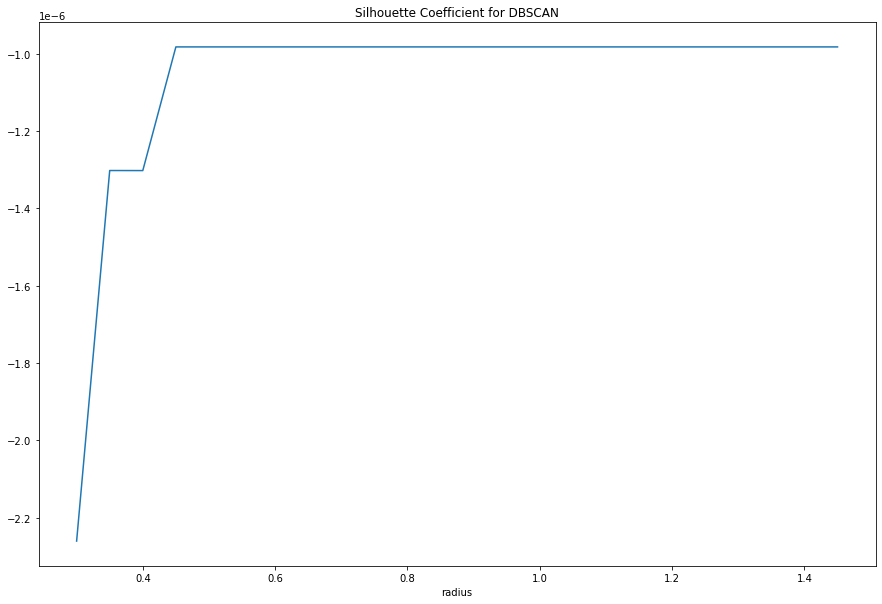

In [507]:
plt.plot(r_list, SC_list_dbscan)
plt.title('Silhouette Coefficient for DBSCAN')
plt.xlabel('radius')

Text(0.5, 0, 'radius')

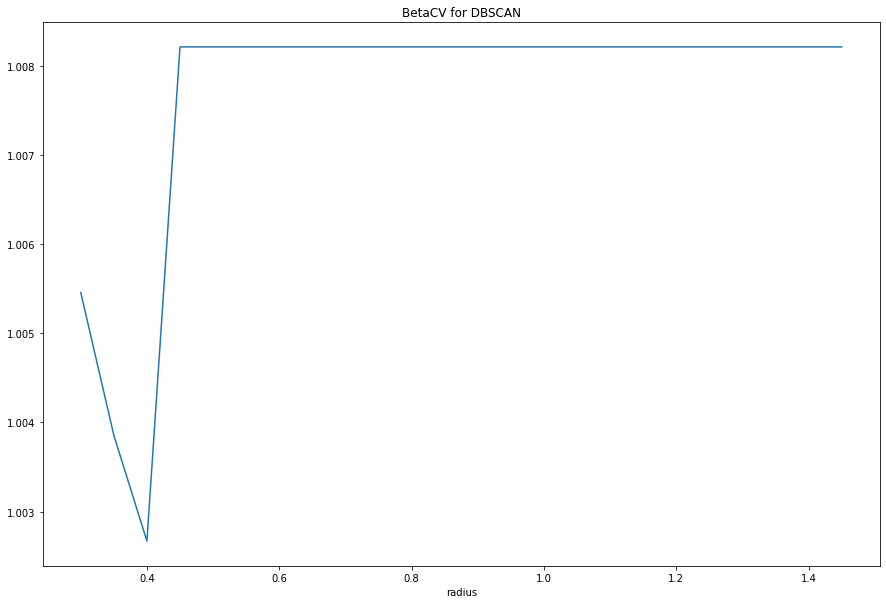

In [508]:
plt.plot(r_list, BetaCV_list_dbscan)
plt.title('BetaCV for DBSCAN')
plt.xlabel('radius')

Text(0.5, 0, 'radius')

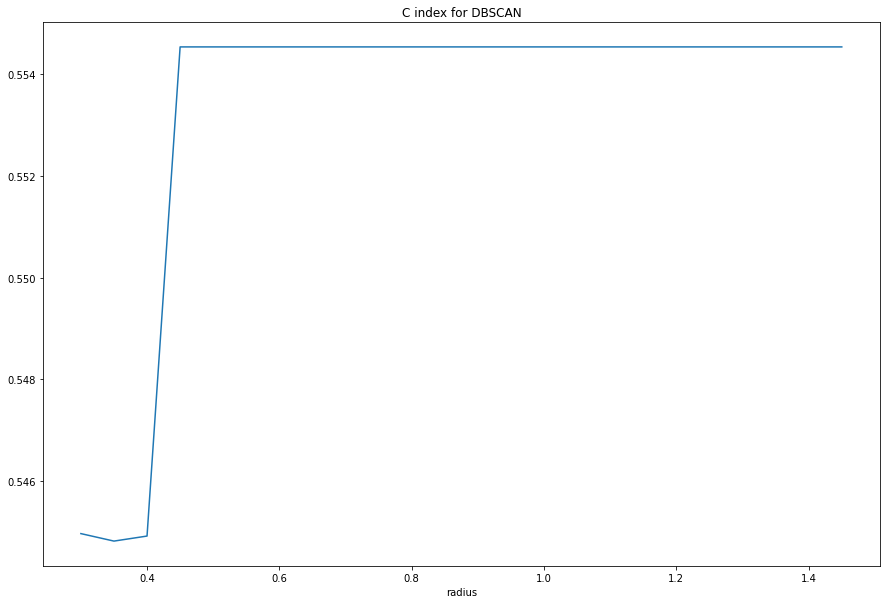

In [509]:
plt.plot(r_list, Cindex_list_dbscan)
plt.title('C index for DBSCAN')
plt.xlabel('radius')